<a href="https://colab.research.google.com/github/OmdenaAI/omdena-canada-aigovernance/blob/main/src/tasks/task%20-%20X%20-%20EDA/CoronaNet_EDA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import StratifiedKFold

In [64]:
url = "https://raw.githubusercontent.com/CoronaNetDataScience/corona_tscs/master/data/CoronaNet/data_country/coronanet_release/coronanet_release_Canada.csv"
df= pd.read_csv(url)
print(df)

                  record_id    policy_id  ... date_updated         recorded_date
0       R_1IFRA729KAc34j6NA      8210233  ...   2020-09-14  2020-09-14T23:27:57Z
1       R_1LpM6iIK9Qt3n04NA       135652  ...   2020-09-15  2020-09-15T13:43:28Z
2       R_zTscGXXMieVMbehDy    4556417Dy  ...   2020-05-12  2020-05-12T17:20:47Z
3       R_zTscGXXMieVMbehEa    4556417Ea  ...   2020-05-12  2020-05-12T17:20:47Z
4       R_zTscGXXMieVMbehFj    4556417Fj  ...   2020-05-12  2020-05-12T17:20:47Z
...                     ...          ...  ...          ...                   ...
1185  R_3GpL8SghWvx0pthGfMa  5947923GfMa  ...   2020-10-16  2020-10-16T11:08:00Z
1186    R_1DM7EJtVFWspMESFh      9196276  ...   2021-01-28  2021-01-28T14:16:39Z
1187    R_2cw0W1ftmc8eZNrGm      5060649  ...   2020-12-06  2020-12-06T08:44:07Z
1188  R_sbvpphdi8NgBqq5DkMa  5889696DkMa  ...   2021-04-27  2021-04-27T14:14:31Z
1189    R_TnJQLU3CPtn2y1HFh      9196276  ...   2021-02-17  2021-02-17T14:38:17Z

[1190 rows x 40 columns]


In [65]:
df.head()

,record_id,policy_id,entry_type,correct_type,update_type,update_level,description,date_announced,date_start,date_end,country,ISO_A3,ISO_A2,init_country_level,domestic_policy,province,ISO_L2,city,type,type_sub_cat,type_text,institution_status,target_country,target_geog_level,target_region,target_province,target_city,target_other,target_who_what,target_direction,travel_mechanism,compliance,enforcer,dist_index_high_est,dist_index_med_est,dist_index_low_est,dist_index_country_rank,link,date_updated,recorded_date
0,R_1IFRA729KAc34j6NA,8210233,new_entry,original,NaN,NaN,Canada--Health Canada released a statement Mar...,2020-03-20,2020-03-20,2020-03-20,Canada,CAN,CA,National,1,NaN,NaN,NaN,Anti-Disinformation Measures,NaN,NaN,NaN,Canada,"One or more countries, but not all countries",NaN,NaN,NaN,NaN,All Residents (Citizen Residents + Foreign Res...,NaN,NaN,Voluntary/Recommended but No Penalties,Ministry/Department of Health,59.667830,56.602044,53.559257,86.0,https://healthycanadians.gc.ca/recall-alert-ra...,2020-09-14,2020-09-14T23:27:57Z
1,R_1LpM6iIK9Qt3n04NA,135652,new_entry,original,NaN,NaN,"Canada, Health Canada released a statement Apr...",2020-04-25,2020-04-25,2020-04-25,Canada,CAN,CA,National,1,NaN,NaN,NaN,Anti-Disinformation Measures,NaN,NaN,NaN,Canada,"One or more countries, but not all countries",NaN,NaN,NaN,NaN,All Residents (Citizen Residents + Foreign Res...,NaN,NaN,Voluntary/Recommended but No Penalties,Ministry/Department of Health,64.989414,62.311475,59.309292,36.0,https://healthycanadians.gc.ca/recall-alert-ra...,2020-09-15,2020-09-15T13:43:28Z
2,R_zTscGXXMieVMbehDy,4556417Dy,update,original,End of Policy,NaN,"Canada, NB, May 8 ""Effective Monday, March 16,...",2020-05-08,2020-03-08,NaN,Canada,CAN,CA,Provincial,1,New Brunswick,NaN,NaN,Closure and Regulation of Schools,Preschool or childcare facilities (generally f...,NaN,Preschool or childcare facilities closed/locke...,Canada,NaN,NaN,New Brunswick,NaN,NaN,All Residents (Citizen Residents + Foreign Res...,NaN,NaN,Mandatory (Unspecified/Implied),Provincial/State Government,37.948284,34.127651,29.866326,90.0,NA ; https://www2.gnb.ca/content/gnb/en/news/n...,2020-05-12,2020-05-12T17:20:47Z
3,R_zTscGXXMieVMbehEa,4556417Ea,update,original,End of Policy,NaN,"Canada, NB, May 8 ""Effective Monday, March 16,...",2020-05-08,2020-03-08,NaN,Canada,CAN,CA,Provincial,1,New Brunswick,NaN,NaN,Closure and Regulation of Schools,Primary Schools (generally for children ages 1...,NaN,Primary Schools closed/locked down,Canada,NaN,NaN,New Brunswick,NaN,NaN,All Residents (Citizen Residents + Foreign Res...,NaN,NaN,Mandatory (Unspecified/Implied),Provincial/State Government,37.948284,34.127651,29.866326,90.0,NA ; https://www2.gnb.ca/content/gnb/en/news/n...,2020-05-12,2020-05-12T17:20:47Z
4,R_zTscGXXMieVMbehFj,4556417Fj,update,original,End of Policy,NaN,"Canada, NB, May 8 ""Effective Monday, March 16,...",2020-05-08,2020-03-08,NaN,Canada,CAN,CA,Provincial,1,New Brunswick,NaN,NaN,Closure and Regulation of Schools,Secondary Schools (generally for children ages...,NaN,Secondary Schools closed/locked down,Canada,NaN,NaN,New Brunswick,NaN,NaN,All Residents (Citizen Residents + Foreign Res...,NaN,NaN,Mandatory (Unspecified/Implied),Provincial/State Government,37.948284,34.127651,29.866326,90.0,NA ; https://www2.gnb.ca/content/gnb/en/news/n...,2020-05-12,2020-05-12T17:20:47Z


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   record_id                1190 non-null   object 
 1   policy_id                1190 non-null   object 
 2   entry_type               1190 non-null   object 
 3   correct_type             1190 non-null   object 
 4   update_type              424 non-null    object 
 5   update_level             377 non-null    object 
 6   description              1190 non-null   object 
 7   date_announced           1190 non-null   object 
 8   date_start               1190 non-null   object 
 9   date_end                 535 non-null    object 
 10  country                  1190 non-null   object 
 11  ISO_A3                   1190 non-null   object 
 12  ISO_A2                   1190 non-null   object 
 13  init_country_level       1183 non-null   object 
 14  domestic_policy         

In [67]:
df.columns

Index(['record_id', 'policy_id', 'entry_type', 'correct_type', 'update_type',
       'update_level', 'description', 'date_announced', 'date_start',
       'date_end', 'country', 'ISO_A3', 'ISO_A2', 'init_country_level',
       'domestic_policy', 'province', 'ISO_L2', 'city', 'type', 'type_sub_cat',
       'type_text', 'institution_status', 'target_country',
       'target_geog_level', 'target_region', 'target_province', 'target_city',
       'target_other', 'target_who_what', 'target_direction',
       'travel_mechanism', 'compliance', 'enforcer', 'dist_index_high_est',
       'dist_index_med_est', 'dist_index_low_est', 'dist_index_country_rank',
       'link', 'date_updated', 'recorded_date'],
      dtype='object')

In [68]:
df.isnull().sum()

record_id                     0
policy_id                     0
entry_type                    0
correct_type                  0
update_type                 766
update_level                813
description                   0
date_announced                0
date_start                    0
date_end                    655
country                       0
ISO_A3                        0
ISO_A2                        0
init_country_level            7
domestic_policy               0
province                    189
ISO_L2                     1190
city                       1184
type                          0
type_sub_cat                326
type_text                  1159
institution_status          736
target_country                8
target_geog_level           598
target_region              1184
target_province             190
target_city                1170
target_other               1190
target_who_what              15
target_direction           1069
travel_mechanism           1051
complian

In [69]:
df.drop(columns=df[['ISO_A3','ISO_A2','ISO_L2','city','type_text','target_other', 'link', 
                        'target_direction','travel_mechanism','update_type','update_level','country','date_updated','recorded_date']],inplace=True)

In [70]:
#just clean the title
df = df.rename(columns={x:x.replace('_', ' ')
    for x in df.columns})
#convert date time
pd.to_datetime(df['date announced'])
pd.to_datetime(df['date start'])
pd.to_datetime(df['date end'])

#extract only month since all study happend in 2020
df['date announced'] = pd.to_datetime(df['date announced']).dt.month
df['date start'] = pd.to_datetime(df['date start']).dt.month
df['date end'] =pd.to_datetime(df['date end']).dt.month
df['date end'] = df['date end'].index.astype(int)

df.head(5)

,record id,policy id,entry type,correct type,description,date announced,date start,date end,init country level,domestic policy,province,type,type sub cat,institution status,target country,target geog level,target region,target province,target city,target who what,compliance,enforcer,dist index high est,dist index med est,dist index low est,dist index country rank
0,R_1IFRA729KAc34j6NA,8210233,new_entry,original,Canada--Health Canada released a statement Mar...,3,3,0,National,1,NaN,Anti-Disinformation Measures,NaN,NaN,Canada,"One or more countries, but not all countries",NaN,NaN,NaN,All Residents (Citizen Residents + Foreign Res...,Voluntary/Recommended but No Penalties,Ministry/Department of Health,59.667830,56.602044,53.559257,86.0
1,R_1LpM6iIK9Qt3n04NA,135652,new_entry,original,"Canada, Health Canada released a statement Apr...",4,4,1,National,1,NaN,Anti-Disinformation Measures,NaN,NaN,Canada,"One or more countries, but not all countries",NaN,NaN,NaN,All Residents (Citizen Residents + Foreign Res...,Voluntary/Recommended but No Penalties,Ministry/Department of Health,64.989414,62.311475,59.309292,36.0
2,R_zTscGXXMieVMbehDy,4556417Dy,update,original,"Canada, NB, May 8 ""Effective Monday, March 16,...",5,3,2,Provincial,1,New Brunswick,Closure and Regulation of Schools,Preschool or childcare facilities (generally f...,Preschool or childcare facilities closed/locke...,Canada,NaN,NaN,New Brunswick,NaN,All Residents (Citizen Residents + Foreign Res...,Mandatory (Unspecified/Implied),Provincial/State Government,37.948284,34.127651,29.866326,90.0
3,R_zTscGXXMieVMbehEa,4556417Ea,update,original,"Canada, NB, May 8 ""Effective Monday, March 16,...",5,3,3,Provincial,1,New Brunswick,Closure and Regulation of Schools,Primary Schools (generally for children ages 1...,Primary Schools closed/locked down,Canada,NaN,NaN,New Brunswick,NaN,All Residents (Citizen Residents + Foreign Res...,Mandatory (Unspecified/Implied),Provincial/State Government,37.948284,34.127651,29.866326,90.0
4,R_zTscGXXMieVMbehFj,4556417Fj,update,original,"Canada, NB, May 8 ""Effective Monday, March 16,...",5,3,4,Provincial,1,New Brunswick,Closure and Regulation of Schools,Secondary Schools (generally for children ages...,Secondary Schools closed/locked down,Canada,NaN,NaN,New Brunswick,NaN,All Residents (Citizen Residents + Foreign Res...,Mandatory (Unspecified/Implied),Provincial/State Government,37.948284,34.127651,29.866326,90.0


In [71]:
type1 = df[df['type'] == 'Anti-Disinformation Measures']
type2 = df[df['type'] == 'Closure and Regulation of Schools']
type3 = df[df['type'] == 'COVID-19 Vaccines']
type4 = df[df['type'] == 'Curfew']
type5 = df[df['type'] == 'Declaration of Emergency']
type6 = df[df['type'] == 'External Border Restrictions']
type7 = df[df['type'] == 'Health Monitoring']
type8 = df[df['type'] == 'Health Resources']
type9 = df[df['type'] == 'Health Testing']
type10 = df[df['type'] == 'Hygiene']
type11 = df[df['type'] == 'Internal Border Restrictions']
type12 = df[df['type'] == 'Lockdown']
type13 = df[df['type'] == 'New Task Force, Bureau or Administrative Configuration']
type14 = df[df['type'] == 'Other Policy Not Listed Above']
type15 = df[df['type'] == 'Public Awareness Measures']
type16 = df[df['type'] == 'Quarantine']
type17 = df[df['type'] == 'Restriction and Regulation of Businesses']
type18 = df[df['type'] == 'Restriction and Regulation of Government Services']
type19 = df[df['type'] == 'Restrictions of Mass Gatherings']
type20 = df[df['type'] == 'Social Distancing']

In [72]:
type1.shape[0], type1['type'][1]

(2, 'Anti-Disinformation Measures')

In [73]:
type2.shape[0], type2['type'][2]

(167, 'Closure and Regulation of Schools')

In [74]:
type3.shape[0], type3['type'][170]

(13, 'COVID-19 Vaccines')

In [75]:
type4.shape[0], type4['type'][182]

(6, 'Curfew')

In [76]:
type5.shape[0], type5['type'][188]

(111, 'Declaration of Emergency')

In [77]:
type6.shape[0], type6['type'][299]

(69, 'External Border Restrictions')

In [78]:
type7.shape[0], type7['type'][368]

(11, 'Health Monitoring')

In [79]:
type8.shape[0], type8['type'][379]

(95, 'Health Resources')

In [80]:
type9.shape[0], type9['type'][474]

(6, 'Health Testing')

In [81]:
type10.shape[0], type10['type'][480]

(2, 'Hygiene')

In [82]:
type11.shape[0], type11['type'][482]

(27, 'Internal Border Restrictions')

In [83]:
type12.shape[0], type12['type'][509]

(12, 'Lockdown')

In [84]:
type13.shape[0], type13['type'][521]

(9, 'New Task Force, Bureau or Administrative Configuration')

In [85]:
type14.shape[0], type14['type'][530]

(31, 'Other Policy Not Listed Above')

In [86]:
type15.shape[0], type15['type'][561]

(15, 'Public Awareness Measures')

In [87]:
type16.shape[0], type16['type'][576]

(89, 'Quarantine')

In [88]:
type17.shape[0], type17['type'][665]

(287, 'Restriction and Regulation of Businesses')

In [89]:
type18.shape[0], type18['type'][952]

(58, 'Restriction and Regulation of Government Services')

In [90]:
type19.shape[0], type19['type'][1010]

(99, 'Restrictions of Mass Gatherings')

In [91]:
type20.shape[0], type20['type'][1109]

(81, 'Social Distancing')

As we can see max policies for 

- Closure and Regulation of Schools
- Restriction and Regulation of Businesses
- Declaration of Emergency

In [92]:
df['type'].unique()

array(['Anti-Disinformation Measures',
       'Closure and Regulation of Schools', 'COVID-19 Vaccines', 'Curfew',
       'Declaration of Emergency', 'External Border Restrictions',
       'Health Monitoring', 'Health Resources', 'Health Testing',
       'Hygiene', 'Internal Border Restrictions', 'Lockdown',
       'New Task Force, Bureau or Administrative Configuration',
       'Other Policy Not Listed Above', 'Public Awareness Measures',
       'Quarantine', 'Restriction and Regulation of Businesses',
       'Restriction and Regulation of Government Services',
       'Restrictions of Mass Gatherings', 'Social Distancing'],
      dtype=object)

In [93]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['type_label']= label_encoder.fit_transform(df['type'])
  
df['type_label'].unique()

array([ 0,  2,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [94]:
import seaborn as sns

In [95]:
dftype = df.groupby('type')['type_label'].count()
dftype

type
Anti-Disinformation Measures                                2
COVID-19 Vaccines                                          13
Closure and Regulation of Schools                         167
Curfew                                                      6
Declaration of Emergency                                  111
External Border Restrictions                               69
Health Monitoring                                          11
Health Resources                                           95
Health Testing                                              6
Hygiene                                                     2
Internal Border Restrictions                               27
Lockdown                                                   12
New Task Force, Bureau or Administrative Configuration      9
Other Policy Not Listed Above                              31
Public Awareness Measures                                  15
Quarantine                                                 89
Res

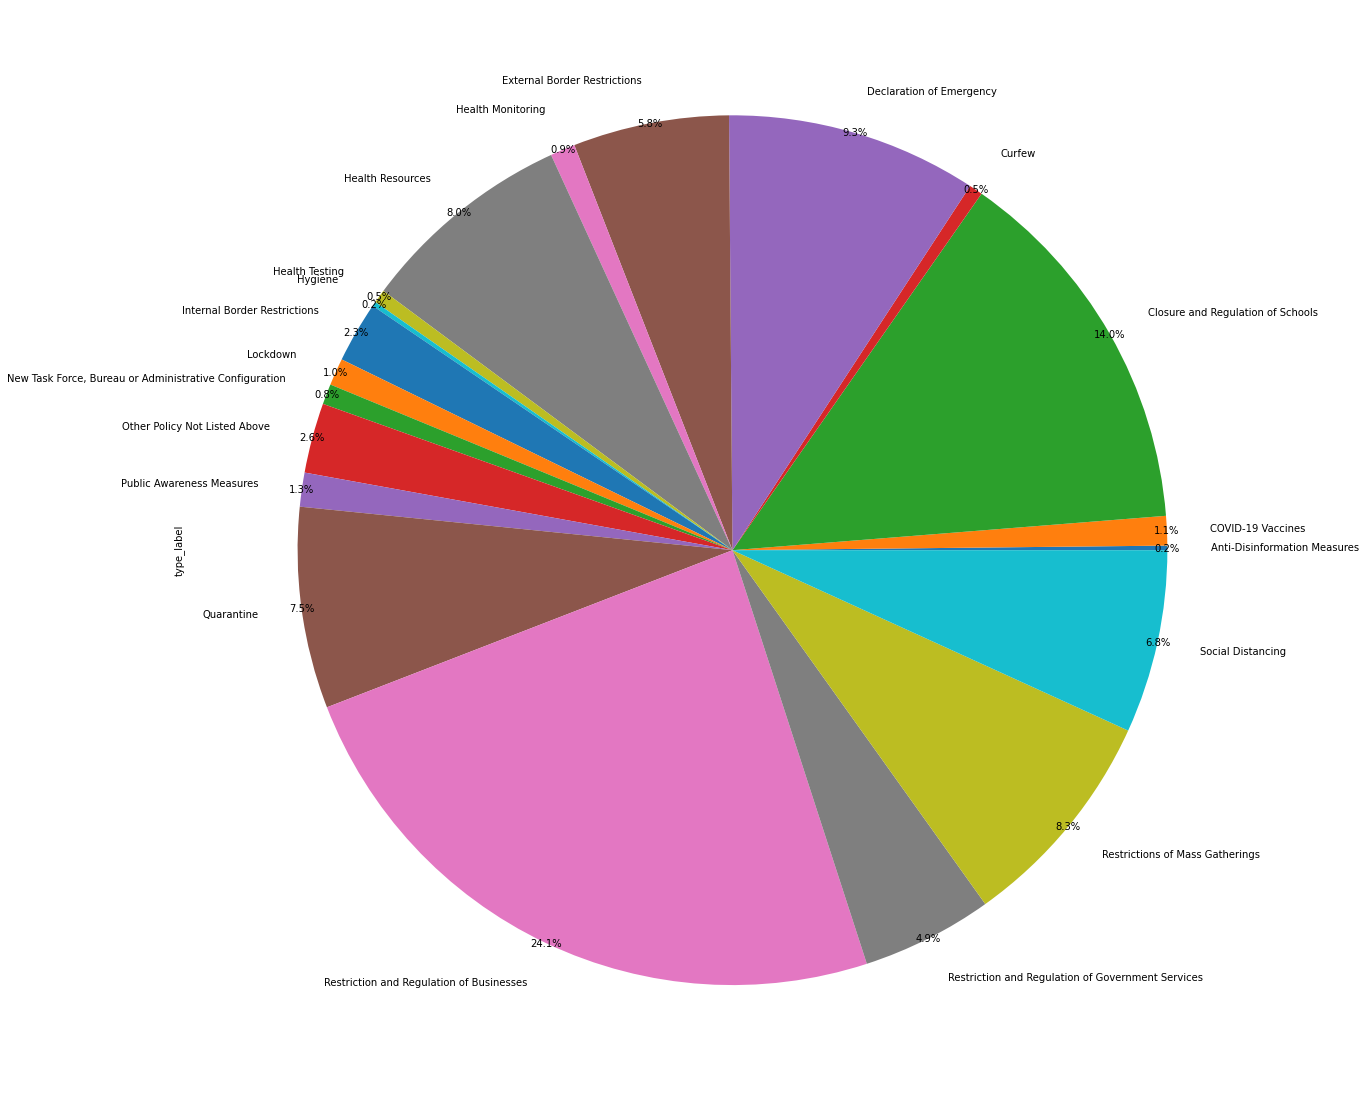

In [96]:
dftype.plot.pie(figsize=[20,20], autopct="%.1f%%", pctdistance=1);

In [97]:
df.columns

Index(['record id', 'policy id', 'entry type', 'correct type', 'description',
       'date announced', 'date start', 'date end', 'init country level',
       'domestic policy', 'province', 'type', 'type sub cat',
       'institution status', 'target country', 'target geog level',
       'target region', 'target province', 'target city', 'target who what',
       'compliance', 'enforcer', 'dist index high est', 'dist index med est',
       'dist index low est', 'dist index country rank', 'type_label'],
      dtype='object')

In [98]:
df['init country level'].isnull().sum()

7

In [99]:
df['init country level'].unique()

array(['National', 'Provincial', 'Municipal', nan], dtype=object)

In [100]:
df1 = df[~df['init country level'].isnull()]

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183 entries, 0 to 1189
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   record id                1183 non-null   object 
 1   policy id                1183 non-null   object 
 2   entry type               1183 non-null   object 
 3   correct type             1183 non-null   object 
 4   description              1183 non-null   object 
 5   date announced           1183 non-null   int64  
 6   date start               1183 non-null   int64  
 7   date end                 1183 non-null   int64  
 8   init country level       1183 non-null   object 
 9   domestic policy          1183 non-null   int64  
 10  province                 1001 non-null   object 
 11  type                     1183 non-null   object 
 12  type sub cat             862 non-null    object 
 13  institution status       454 non-null    object 
 14  target country          

In [102]:
df.shape, df1.shape

((1190, 27), (1183, 27))

In [103]:
df1.head(3)

,record id,policy id,entry type,correct type,description,date announced,date start,date end,init country level,domestic policy,province,type,type sub cat,institution status,target country,target geog level,target region,target province,target city,target who what,compliance,enforcer,dist index high est,dist index med est,dist index low est,dist index country rank,type_label
0,R_1IFRA729KAc34j6NA,8210233,new_entry,original,Canada--Health Canada released a statement Mar...,3,3,0,National,1,NaN,Anti-Disinformation Measures,NaN,NaN,Canada,"One or more countries, but not all countries",NaN,NaN,NaN,All Residents (Citizen Residents + Foreign Res...,Voluntary/Recommended but No Penalties,Ministry/Department of Health,59.667830,56.602044,53.559257,86.0,0
1,R_1LpM6iIK9Qt3n04NA,135652,new_entry,original,"Canada, Health Canada released a statement Apr...",4,4,1,National,1,NaN,Anti-Disinformation Measures,NaN,NaN,Canada,"One or more countries, but not all countries",NaN,NaN,NaN,All Residents (Citizen Residents + Foreign Res...,Voluntary/Recommended but No Penalties,Ministry/Department of Health,64.989414,62.311475,59.309292,36.0,0
2,R_zTscGXXMieVMbehDy,4556417Dy,update,original,"Canada, NB, May 8 ""Effective Monday, March 16,...",5,3,2,Provincial,1,New Brunswick,Closure and Regulation of Schools,Preschool or childcare facilities (generally f...,Preschool or childcare facilities closed/locke...,Canada,NaN,NaN,New Brunswick,NaN,All Residents (Citizen Residents + Foreign Res...,Mandatory (Unspecified/Implied),Provincial/State Government,37.948284,34.127651,29.866326,90.0,2


In [104]:
df1['init country level'].unique()

array(['National', 'Provincial', 'Municipal'], dtype=object)

In [105]:
le = preprocessing.LabelEncoder()  

df1['level_label'] = le.fit_transform(df1['init country level'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
df1['level_label'].value_counts()

2    996
1    181
0      6
Name: level_label, dtype: int64

In [107]:
dftype2 = df1.groupby('init country level')['level_label'].count()
dftype2

init country level
Municipal       6
National      181
Provincial    996
Name: level_label, dtype: int64

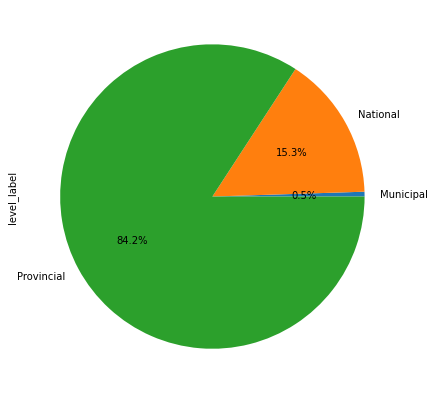

In [108]:
dftype2.plot.pie(figsize=[12,7], autopct="%.1f%%");

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   record id                1190 non-null   object 
 1   policy id                1190 non-null   object 
 2   entry type               1190 non-null   object 
 3   correct type             1190 non-null   object 
 4   description              1190 non-null   object 
 5   date announced           1190 non-null   int64  
 6   date start               1190 non-null   int64  
 7   date end                 1190 non-null   int64  
 8   init country level       1183 non-null   object 
 9   domestic policy          1190 non-null   int64  
 10  province                 1001 non-null   object 
 11  type                     1190 non-null   object 
 12  type sub cat             864 non-null    object 
 13  institution status       454 non-null    object 
 14  target country          

In [110]:
df['correct type'].unique()

array(['original', 'correction'], dtype=object)

In [111]:
df['province'].unique()

array([nan, 'New Brunswick', 'Ontario', 'Alberta', 'Nova Scotia',
       'Newfoundland and Labrador', 'Quebec', 'Nunavut',
       'Prince Edward Island', 'British Columbia', 'Yukon',
       'Saskatchewan', 'Manitoba', 'Northwest Territories'], dtype=object)

In [112]:
df['domestic policy'].unique()

array([1, 0])

In [113]:
df1.columns

Index(['record id', 'policy id', 'entry type', 'correct type', 'description',
       'date announced', 'date start', 'date end', 'init country level',
       'domestic policy', 'province', 'type', 'type sub cat',
       'institution status', 'target country', 'target geog level',
       'target region', 'target province', 'target city', 'target who what',
       'compliance', 'enforcer', 'dist index high est', 'dist index med est',
       'dist index low est', 'dist index country rank', 'type_label',
       'level_label'],
      dtype='object')

In [114]:
df1 = df1.drop(columns=['dist index high est', 'dist index med est',
       'dist index low est', 'dist index country rank'])

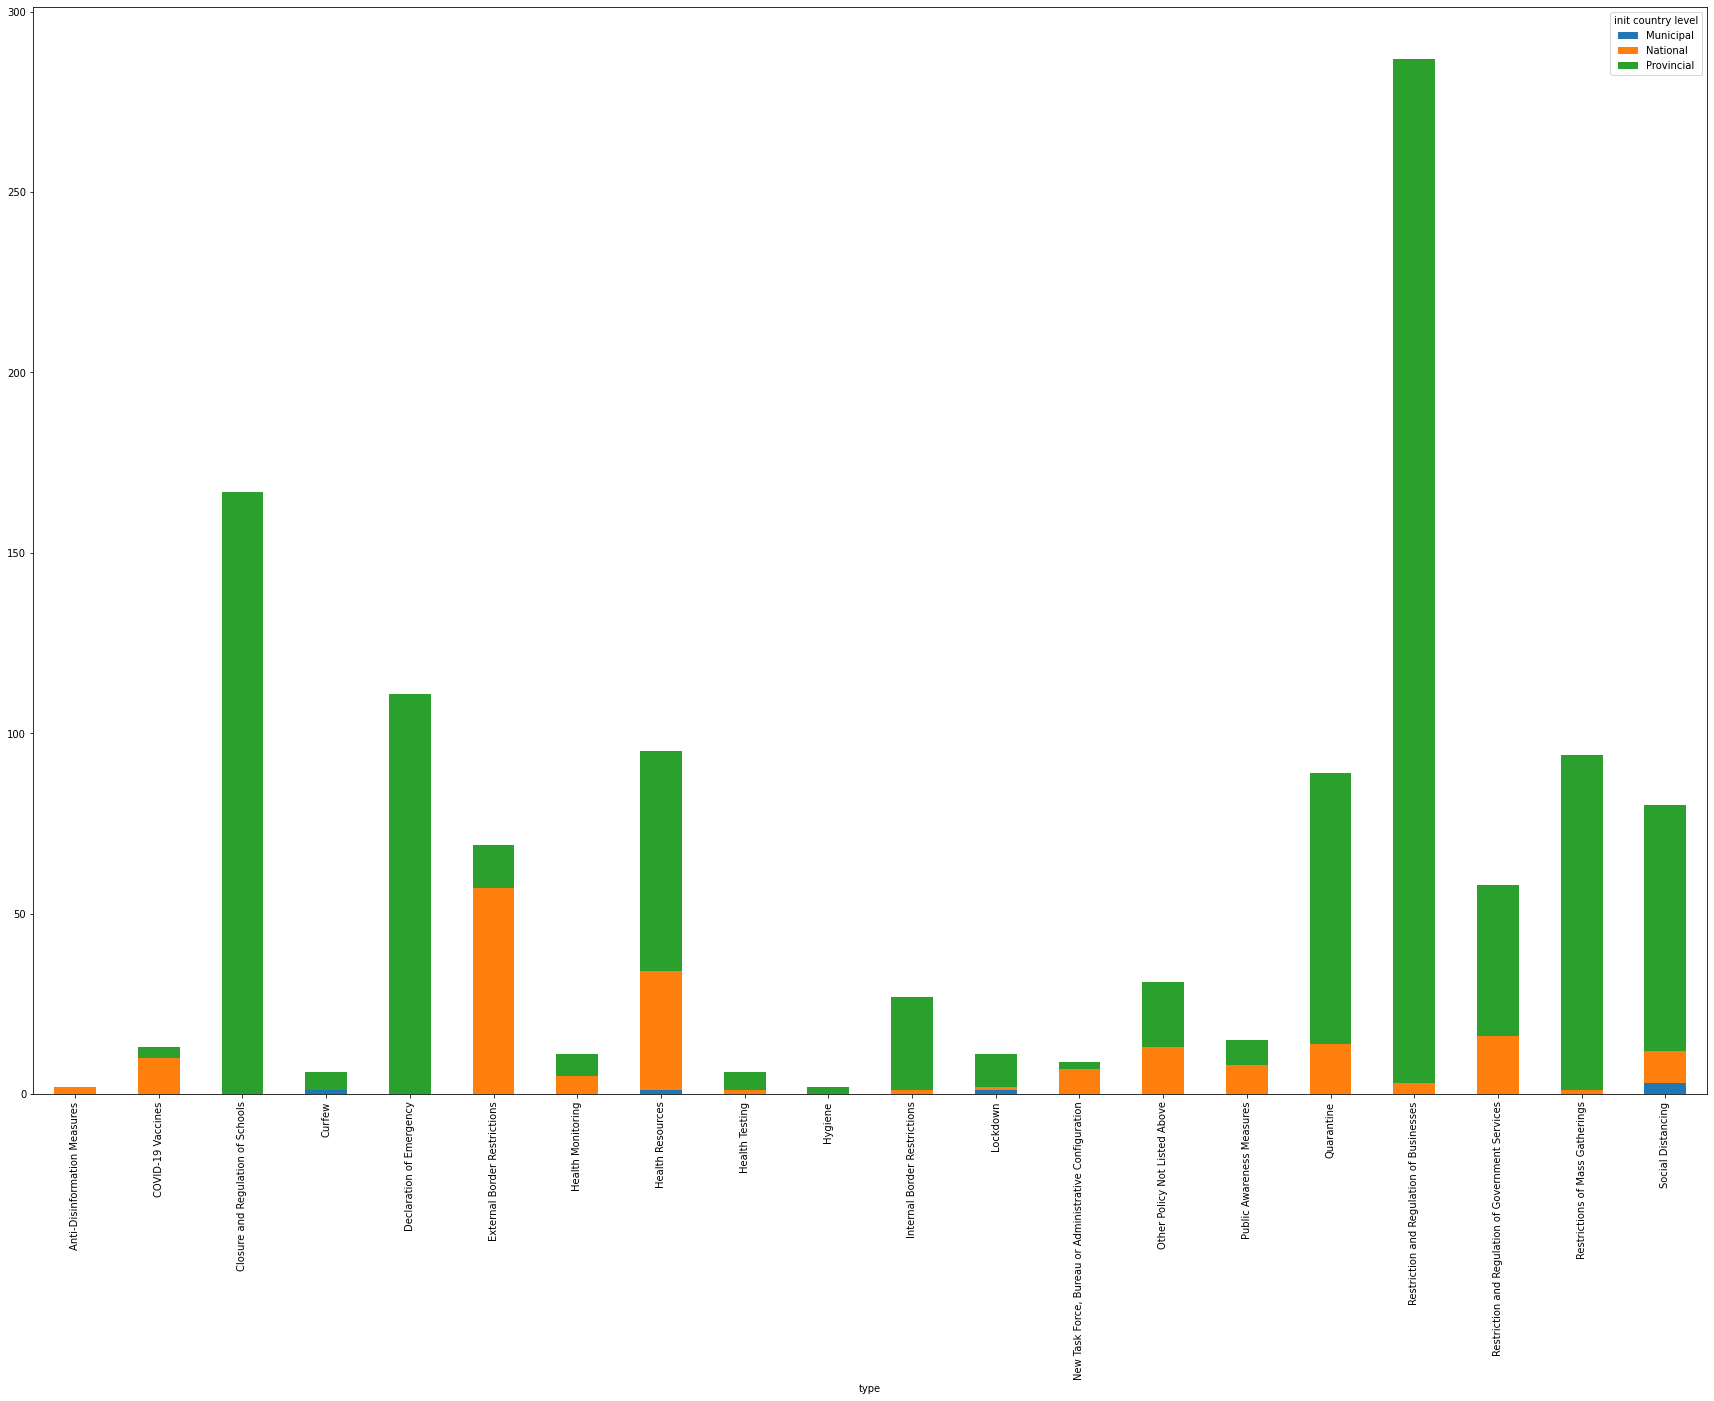

In [115]:
df.groupby(['type', 'init country level']).size().unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30, 20)
plt.show()

In [116]:
type1 = df1[df1['type'] == 'Anti-Disinformation Measures']
type2 = df1[df1['type'] == 'Closure and Regulation of Schools']
type3 = df1[df1['type'] == 'COVID-19 Vaccines']
type4 = df1[df1['type'] == 'Curfew']
type5 = df1[df1['type'] == 'Declaration of Emergency']
type6 = df1[df1['type'] == 'External Border Restrictions']
type7 = df1[df1['type'] == 'Health Monitoring']
type8 = df1[df1['type'] == 'Health Resources']
type9 = df1[df1['type'] == 'Health Testing']
type10 = df1[df1['type'] == 'Hygiene']
type11 = df1[df1['type'] == 'Internal Border Restrictions']
type12 = df1[df1['type'] == 'Lockdown']
type13 = df1[df1['type'] == 'New Task Force, Bureau or Administrative Configuration']
type14 = df1[df1['type'] == 'Other Policy Not Listed Above']
type15 = df1[df1['type'] == 'Public Awareness Measures']
type16 = df1[df1['type'] == 'Quarantine']
type17 = df1[df1['type'] == 'Restriction and Regulation of Businesses']
type18 = df1[df1['type'] == 'Restriction and Regulation of Government Services']
type19 = df1[df1['type'] == 'Restrictions of Mass Gatherings']
type20 = df1[df1['type'] == 'Social Distancing']

In [117]:
type1.columns

Index(['record id', 'policy id', 'entry type', 'correct type', 'description',
       'date announced', 'date start', 'date end', 'init country level',
       'domestic policy', 'province', 'type', 'type sub cat',
       'institution status', 'target country', 'target geog level',
       'target region', 'target province', 'target city', 'target who what',
       'compliance', 'enforcer', 'type_label', 'level_label'],
      dtype='object')

In [118]:
from wordcloud import WordCloud, STOPWORDS

In [119]:
dataframes = [type1, type2, type3, type4, type5, type6, type7, type8, type9, type10, type11, type12, type13, type14,
              type15, type16, type17, type18, type19, type20]


1
canada, health canada released a statement april 25 warning against the use of chloroquine and hydroxychloroquine to treat covid-19. this statement was released in reaction to claims that the drugs can help treat covid-19. 




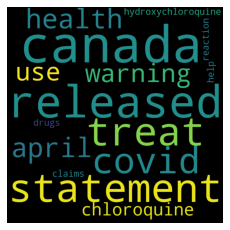


2
canada, manitoba: universities, colleges and private vocational institutions and other businesses that provide group training or instruction may open and may provide online and remote instruction. they may also provide in-person instruction if occupancy in all classrooms and other areas of instruction is restricted to 50% of the usual capacity and the total number of students in any classroom or other area of instruction does not exceed 25. where reasonably possible, measures must be implemented to ensure that there is a two-metre separation between all persons in the classroom or other area of instruction. 




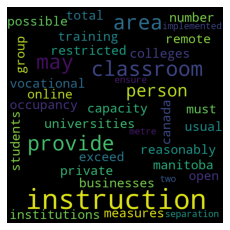


3
on march 5, 2021, health canada authorized the johnson & johnson (janssen inc.) covid-19 vaccine for use in the country. 




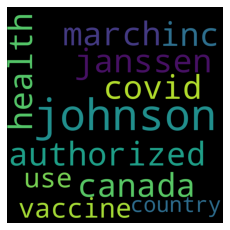


4
canada, quebec, feb 2nd, 2021. in the red zone of the province (regions except for gaspesie-iles-de-la-madelein, bas-st-laurent, abitibi-temiscamingue, cote-nord, nord du quebec and saguenay-lac-st-jean, curfew remains and will take into effect from 8 p.m. to 5 a.m., starting from feb 8th. 




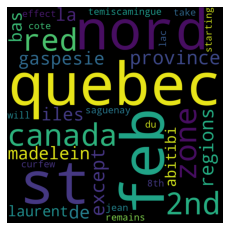


5
canada, m.b., 2 february 2021: the manitoba government is extending the provincewide state of emergency to reduce the spread of covid-19 and further protect manitobans, infrastructure minister ron schuler, minister responsible for the manitoba emergency measures organization, announced today. the extension goes into effect today, feb. 2 at 4 p.m. for a period of 30 days. 




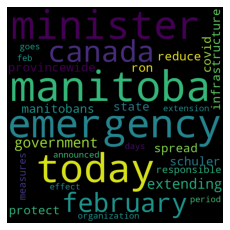


6
canada, beginning march 21, 2020, the canadian government and the united states have agreed to close the border for non-discretionary travel for 30 days, which is april 21, 2020. update: on april 21, 2021, the border restrictions between the us and canada has been extended until may 21, 2021. 




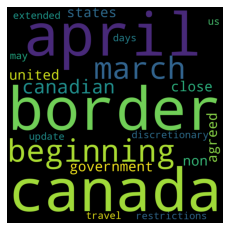


7
canada, nb--as of september 18, 2020, residents in the province can begin to use the covid alert app "which alerts users if they have been exposed to someone who tested positive for the virus." 




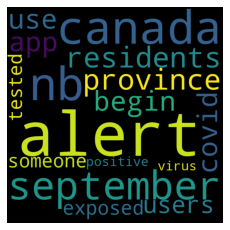


8
starting february 19, 2021, 26 rapid screening testing sites will be established with twelve employers across the country to complete more than 5,000 tests. 




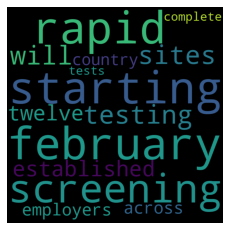


9
canada, m.b., 17 december 2020: public health officials are introducing rapid testing for asymptomatic personal care home staff working in three licensed personal care homes across the province as part of a pilot project around testing in long-term care facilities, health, seniors and active living minister cameron friesen announced today. 




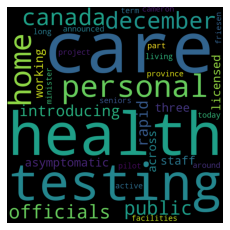


10
premier stephen mcneil and dr. robert strang, chief medical officer of health for nova scotia, canada, announced today, july 24, that masks will become mandatory in most indoor public places starting july 31. 




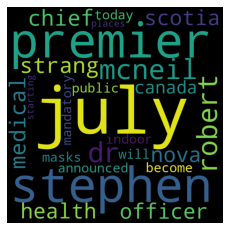


11
canada, bc is not allowing any person to travel to or from the affected area or between the regions of the fraser health authority and the vancouver coastal health authority for any sport related activity, including practice, training, games or tournaments, unless they are an identified by canadian sports institute pacific as a high performance athlete affiliated with an accredited provincial or national sports organization and are already training in the affected area and subject to the safety guidelines of their provincial sports organization. 




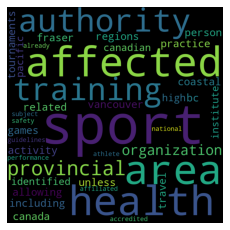


12
in alberta, canada, effective september 17, a new order permits volunteers to return to long-term care facilities for the first time since they were locked down earlier this year. update: the original policy did not permit volunteers upon locking down the long term care facilities however as of september 17, volunteers allowed to come back. 




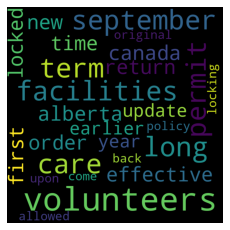


13
on february 2, 2021, the minister of innovation, science and industry established the vaccine and therapeutics task forces and biomanufacturing subcommittee, made up of leading industry experts and scientists, to advise the government on how to address this challenge as a national priority. 




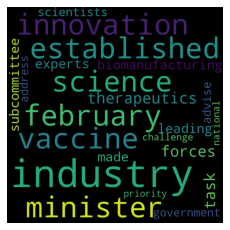


14
canada, o.n., 17 december 2020: the ontario government is providing $77 million to help people who were laid off due to the impact of covid-19 find in-demand jobs in their local communities. this funding is being provided through the redesigned second career grant program and will help more than 2,750 job seekers with up to $28,000 for tuition, training materials and living expenses. 




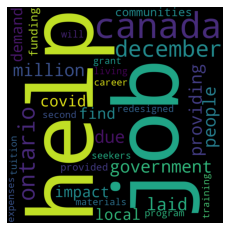


15
canada, health canada released a statement november 26, 2020, about the risks of using ultraviolet (uv) lights and wands that make unproven claims to disinfect against the covid-19 virus. 




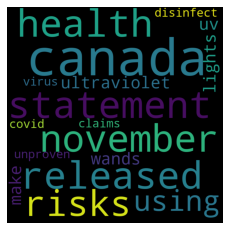


16
the public health agency of canada announced that as of february 22, 2021, all travellers traveling by air, with limited exceptions, into canada, will be required to reserve a 3-night stay in a government-authorized hotel at their own costs while they wait the results of their arrival test. 




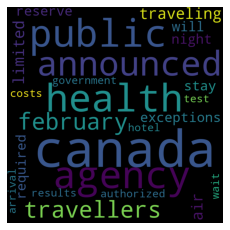


17
in an order from transport canada, "as of june 1, 2020, pleasure craft will be prohibited from operating within canada’s arctic coastal waters (north of the 60th parallel), as well as in the coastal areas of northern quebec and labrador." this measure will remain in place until october 31, 2020. these restrictions do not apply to pleasure craft used by local communities, or used for purposes such as essential transportation or subsistence fishing, harvesting and hunting. update: on february 4, 2021, transport canada has further extended the ban on the operation of pleasure craft in canada's arctic costal waters to include a ban on in all canadian waters until february 28, 2022. 




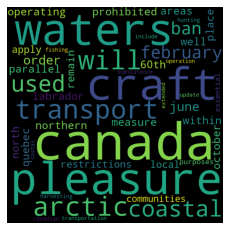


18
canada, members of the house of commons may participate in house proceedings either in person or by videoconference between january 25, 2021 and june 23, 2021. 




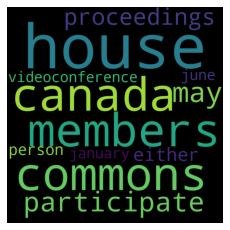


19
canada, b.c. has set a temporary ban on in-person worship services. 




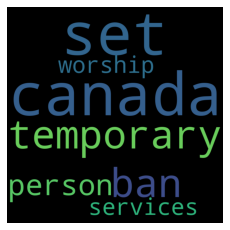


20
the transportation ministry of canada announced october 29, 2020 that "cruise ships with overnight accommodations carrying more than 100 people continue to be prohibited from operating in canadian waters. all other passenger vessels must continue following provincial, territorial, local and regional health authority guidance. passenger vessels carrying more than 12 people continue to be prohibited from entering arctic coastal waters, including nunatsiavut, nunavik and the labrador coast. adventure-seeking pleasure craft also continue to be banned in arctic waters" until at least february 28, 2021 in order to keep canadians safe during the pandemic. update: on february 4, 2021, transport canada has further extended the ban on the operation of pleasure craft in canada's arctic costal waters to include a ban on in all canadian waters until february 28, 2022. 




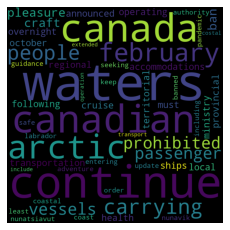

In [120]:
dataframe_num = 1
for i in dataframes:
  comment_words = ''
  stopwords = set(STOPWORDS)

  for val in i.description:

      val = str(val)

      tokens = val.split()

      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
     
  comment_words += " ".join(tokens)+" "

  print()
  print(dataframe_num)
  print(comment_words)
  print()
  print()

  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

  plt.figure(figsize = (3, 3), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
 
  plt.show()
  dataframe_num = dataframe_num+1

In [121]:
df['type sub cat'].unique()

array([nan,
       'Preschool or childcare facilities (generally for children ages 5 and below)',
       'Primary Schools (generally for children ages 10 and below)',
       'Secondary Schools (generally for children ages 10 to 18)',
       'Higher education institutions (i.e. degree granting institutions)',
       'Higher education (i.e. degree granting institutions)',
       'Purchase of COVID-19 vaccines',
       'Administering of the vaccine (i.e. giving people the vaccine shot)',
       'Shipping of the vaccine',
       'Regulatory approval process for administering the COVID-19 vaccine',
       'Health Screenings (e.g. temperature checks)',
       'Travel History Form (e.g. documents where traveler has recently been)',
       'Other External Border Restriction', 'Total border crossing ban',
       'Visa restrictions (e.g. suspend issuance of visa)',
       'Health Certificates',
       'A person’s absolute (e.g. GPS) location over time',
       'A community’s epidemiological stat

In [122]:
df.columns

Index(['record id', 'policy id', 'entry type', 'correct type', 'description',
       'date announced', 'date start', 'date end', 'init country level',
       'domestic policy', 'province', 'type', 'type sub cat',
       'institution status', 'target country', 'target geog level',
       'target region', 'target province', 'target city', 'target who what',
       'compliance', 'enforcer', 'dist index high est', 'dist index med est',
       'dist index low est', 'dist index country rank', 'type_label'],
      dtype='object')

In [123]:
df1.columns

Index(['record id', 'policy id', 'entry type', 'correct type', 'description',
       'date announced', 'date start', 'date end', 'init country level',
       'domestic policy', 'province', 'type', 'type sub cat',
       'institution status', 'target country', 'target geog level',
       'target region', 'target province', 'target city', 'target who what',
       'compliance', 'enforcer', 'type_label', 'level_label'],
      dtype='object')

In [ ]:
# To extract the unique values of provinces in Canada

In [128]:
prov_list = df1['province'].unique().tolist()
del prov_list[0]
prov_list

['New Brunswick',
 'Ontario',
 'Alberta',
 'Nova Scotia',
 'Newfoundland and Labrador',
 'Quebec',
 'Nunavut',
 'Prince Edward Island',
 'British Columbia',
 'Yukon',
 'Saskatchewan',
 'Manitoba',
 'Northwest Territories']

Creating seperate dataframes for each province

In [131]:
df1_dict = {prov: df1.loc[df1['province'] == prov] for prov in prov_list}



Testing whether the code could pick out the rows for the province "New Brunswick".

In [134]:
df1_dict['New Brunswick'].shape

(122, 24)

Examining the shapes of the seperate dataframes for each province in Canada

In [139]:
for prov in prov_list:
  print(f"{prov} dataframe has {df1_dict[prov].shape[0]} rows and {df1_dict[prov].shape[1]} columns")

New Brunswick dataframe has 122 rows and 24 columns
Ontario dataframe has 174 rows and 24 columns
Alberta dataframe has 67 rows and 24 columns
Nova Scotia dataframe has 63 rows and 24 columns
Newfoundland and Labrador dataframe has 51 rows and 24 columns
Quebec dataframe has 140 rows and 24 columns
Nunavut dataframe has 21 rows and 24 columns
Prince Edward Island dataframe has 62 rows and 24 columns
British Columbia dataframe has 73 rows and 24 columns
Yukon dataframe has 42 rows and 24 columns
Saskatchewan dataframe has 48 rows and 24 columns
Manitoba dataframe has 105 rows and 24 columns
Northwest Territories dataframe has 33 rows and 24 columns


Defined a function to sort dataframe by policy start date

In [147]:
def df_province_sort(prov):
  df1_dict[prov].sort_values(by='date start')
  print(df1_dict[prov])



For every province, we have sorted the dataframe by policy start date


In [151]:
for prov in prov_list:
  print(f"{prov} dataframe")
  df_province_sort(prov)

New Brunswick dataframe
                  record id    policy id  ... type_label level_label
2       R_zTscGXXMieVMbehDy    4556417Dy  ...          2           2
3       R_zTscGXXMieVMbehEa    4556417Ea  ...          2           2
4       R_zTscGXXMieVMbehFj    4556417Fj  ...          2           2
5       R_zTscGXXMieVMbehCe    4556417Ce  ...          2           2
18      R_8rmqGCtsq0lT5y9Ea    4556417Ea  ...          2           2
...                     ...          ...  ...        ...         ...
1167    R_UMeVWqJhBgDSRJTNA      1442420  ...         19           2
1168    R_0VDHv8MsKDiTViFNA      1442420  ...         19           2
1175  R_1MWHVAfHpqPn2AgGfMa  5073039GfMa  ...         19           0
1176    R_3dPJ9pDVtF5BZkaCm      5550334  ...         19           2
1177    R_3dPJ9pDVtF5BZkaGs      5550334  ...         19           2

[122 rows x 24 columns]
Ontario dataframe
                record id policy id  ... type_label level_label
6     R_23eHZbtKL2ULBQ7Ea  146165Ea  ... 